#####  Data Science Project: Using Machine Learning to Predict Prices of Houses in Nigeria


#### Abstract

The objective of this project was to build a model capable of predicting house prices based on a set of features.

To achieve this, I experimented with various machine learning models and used cross-validation on the training dataset to identify the one that performed best. Model performance was evaluated using the Root Mean Squared Error (RMSE) metric.

After testing, the XGBoost Regressor emerged as the most effective model, delivering strong results with an RMSE of ₦267.49 million when predicting house prices in Nigeria.

Overall, the model demonstrated a solid ability to approximate actual prices.

Let’s take a look at some of the best predictions - where our model was good at imitating the actual price.


In [75]:
data_pred

,Prediction,Target,Difference%
1429,359941568.00,360000000.00,0.02
1989,14994690.00,15000000.00,0.04
460,78040696.00,78000000.00,0.05
1539,8495172.00,8500000.00,0.06
4613,60093096.00,60000000.00,0.16
...,...,...,...
3676,199372464.00,4000000.00,4884.31
2246,154103664.00,3000000.00,5036.79
3914,81339304.00,1300000.00,6156.87
48,30398974.00,462837.00,6467.97


From the above, We can observe that our model closely followed the actual prices for the most part. However, at certain points, the predicted values exceeded the actual prices.

This reflects the complex dynamics of Nigeria’s economy, particularly in light of recent government reforms and policies—such as fuel subsidy removal and exchange rate unification—which have significantly driven up the cost of living and inflated prices across various sectors.

Table of Contents

- Introduction
- Data
- Data Wrangling
  - Exploratory Data Analysis (EDA)
  - Data Cleaning
- Data Pre-Processing
- Training
- Testing
- Result
- Conclusion
- Limitations

#### Introduction

In Nigeria’s real estate market, understanding the factors that influence property values is crucial. This knowledge provides valuable insights for anyone seeking to grasp the dynamics of the housing market, as well as for professionals focused on price forecasting and valuation analysis.

As an economist, my goal in this data science project is to estimate property prices based on market value using historical data.

In this report, I’ll walk you through the steps I took to achieve this objective. 

Stay tuned!


### Data
The Nigerian House Price Dataset  for this project was gotten from Kaggle.

Let's start by importing some Python Libraries

In [2]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Let's load the dataset and have a quick view about it

In [3]:
df = pd.read_csv('nigeria_houses_data.csv')
df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6,5,5,4,Detached Duplex,Mabushi,Abuja,450000000.0
1,4,5,5,4,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0


Let's get some information about the data 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  int64  
 1   bathrooms      24326 non-null  int64  
 2   toilets        24326 non-null  int64  
 3   parking_space  24326 non-null  int64  
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 1.5+ MB


It is clearly we have 7 features and the target variables - Price. Only 3 of the features are in string format.

Let's check null values

In [5]:
df.isna().sum()

bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            0
town             0
state            0
price            0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(10438)

From the result there is no null values or duplicated values. if there is null and duplicates we would I have used the code commented below to resolve this issue

In [7]:
#df.dropna(inplace=True)
#df.drop_duplicates(inplace=True)

### Data Wrangling
  - Exploratory Data Analysis (EDA)
  - Data Cleaning

Let's took a look at the summary statistics, this give us the opportunity to understand our data better and how the numerical features and target variables are distribuited. let use the describe function for that

In [8]:
df.describe()

,bedrooms,bathrooms,toilets,parking_space,price
count,24326.000000,24326.000000,24326.000000,24326.000000,2.432600e+04
mean,4.338814,4.600798,5.176355,4.041725,3.013802e+08
std,1.138497,1.163161,1.226253,1.399936,1.220403e+10
min,1.000000,1.000000,1.000000,1.000000,9.000000e+04
25%,4.000000,4.000000,5.000000,4.000000,5.200000e+07
50%,4.000000,5.000000,5.000000,4.000000,8.500000e+07
75%,5.000000,5.000000,6.000000,4.000000,1.600000e+08
max,9.000000,9.000000,9.000000,9.000000,1.800000e+12


From this, we can quickly observe that numerical features such as bedrooms, bathrooms, toilets, and parking spaces have minimum and maximum values ranging from 1 to 9. For example, properties have at least 1 bedroom and at most 9 bedrooms. The same range applies to the other features as well.

Use the T function to transpose the summary statistics result showed eariler

In [9]:
stat = df.describe()
stat = stat.T
stat

,count,mean,std,min,25%,50%,75%,max
bedrooms,24326.0,4.338814e+00,1.138497e+00,1.0,4.0,4.0,5.0,9.000000e+00
bathrooms,24326.0,4.600798e+00,1.163161e+00,1.0,4.0,5.0,5.0,9.000000e+00
toilets,24326.0,5.176355e+00,1.226253e+00,1.0,5.0,5.0,6.0,9.000000e+00
parking_space,24326.0,4.041725e+00,1.399936e+00,1.0,4.0,4.0,4.0,9.000000e+00
price,24326.0,3.013802e+08,1.220403e+10,90000.0,52000000.0,85000000.0,160000000.0,1.800000e+12


In [10]:
df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6,5,5,4,Detached Duplex,Mabushi,Abuja,450000000.0
1,4,5,5,4,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0


Let's look at the number count for our state qualitative features and see what it look like

In [11]:
df['state'].value_counts()

state
Lagos          18445
Abuja           3524
Ogun             637
Oyo              477
Rivers           444
Imo              246
Anambara         144
Enugu            128
Edo              100
Delta             63
Akwa Ibom         25
Kaduna            23
Osun              12
Abia               9
Kwara              9
Nasarawa           9
Ekiti              9
Kogi               8
Katsina            2
Cross River        2
Plateau            2
Kano               2
Borno              2
Bayelsa            2
Anambar            1
Niger              1
Name: count, dtype: int64

From the output above, we noticed a spelling issue with "Anambara" — it should be correctly spelled as "Anambra".

To fix this, we used the str.replace() function.

See the corrected result below.

In [12]:
df['state'] = df['state'].str.replace('Anambara', 'Anambra')
df['state'].value_counts(ascending = False)

state
Lagos          18445
Abuja           3524
Ogun             637
Oyo              477
Rivers           444
Imo              246
Anambra          144
Enugu            128
Edo              100
Delta             63
Akwa Ibom         25
Kaduna            23
Osun              12
Abia               9
Kwara              9
Nasarawa           9
Ekiti              9
Kogi               8
Katsina            2
Cross River        2
Plateau            2
Kano               2
Borno              2
Bayelsa            2
Anambar            1
Niger              1
Name: count, dtype: int64

It’s no surprise to see Lagos and Abuja ranking as the top states. 

These cities are often densely populated due to the abundance of opportunities—ranging from jobs and businesses to contracts and other economic activities. 

As a result, they tend to be highly sought after and frequently oversubscribed.

Let's have a visual of the top states and bottom states.

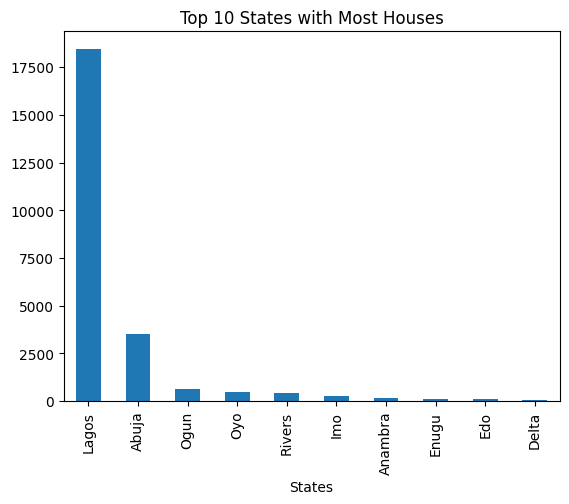

In [13]:
df['state'].value_counts(ascending = False).head(10).plot(kind ='bar')
plt.title('Top 10 States with Most Houses')
plt.xlabel('States')
plt.show()

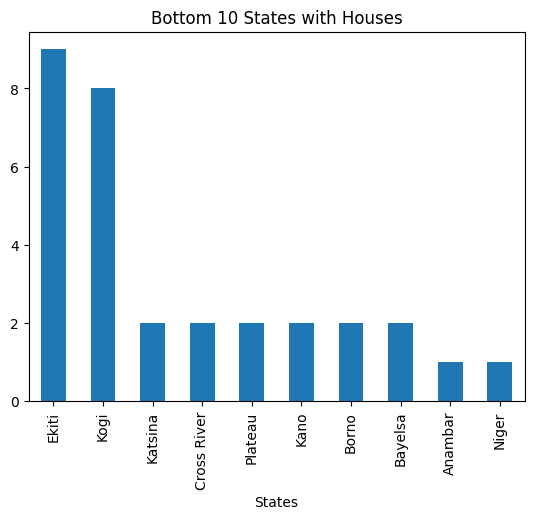

In [14]:
df['state'].value_counts(ascending = False).tail(10).plot(kind ='bar')
plt.title('Bottom 10 States with Houses')
plt.xlabel('States')


plt.show()

Taking a closer look at the distribution of properties across states, we further examine how they are spread across major towns and cities. Interestingly, 7 out of the top 10 cities are located in Lagos State. 

This reinforces Lagos’ position as the economic hub of Nigeria’s real estate market, largely driven by its high population density.



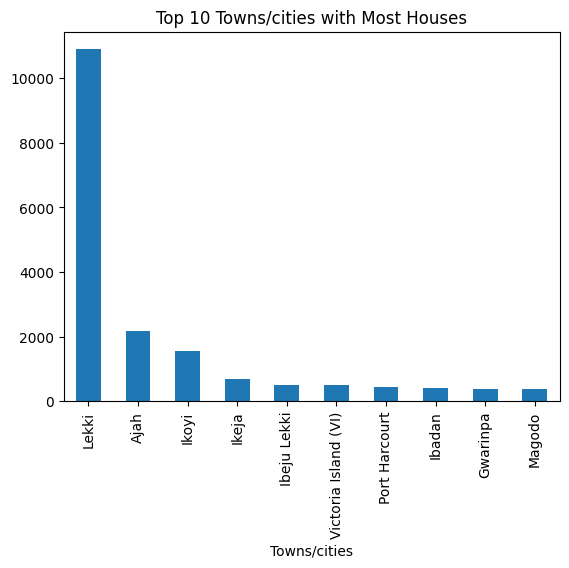

In [15]:
df['town'].value_counts().head(10).plot(kind ='bar')
plt.title('Top 10 Towns/cities with Most Houses')
plt.xlabel('Towns/cities')

plt.show()

#### Let's look at the average prices of house across states

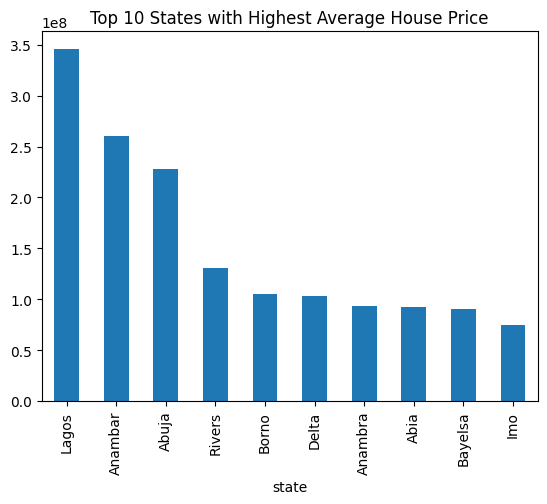

In [16]:
df.groupby('state')['price'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 States with Highest Average House Price')
plt.show()

I was surprised to see Anambra ranked among the top three states with the highest average house prices. 

While this is somewhat unexpected, it serves as a reminder that real estate trends can be unpredictable. 

Interestingly, Imo State also appeared among the bottom of the top 10 states with the highest average house prices.

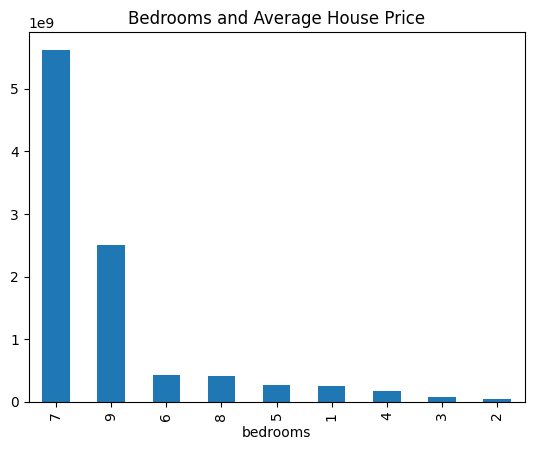

In [17]:
df.groupby('bedrooms')['price'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Bedrooms and Average House Price')
plt.show()


Obviously, the more the bedrooms the higher the price. This is consistent with both theory and expectation

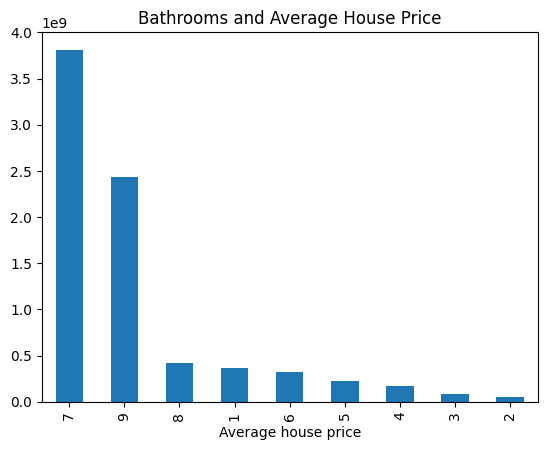

In [18]:
df.groupby('bathrooms')['price'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Bathrooms and Average House Price')
plt.xlabel('Average house price')


plt.show()

Obviously, the more the bathrooms the higher the price. This is consistent with both theory and expectation

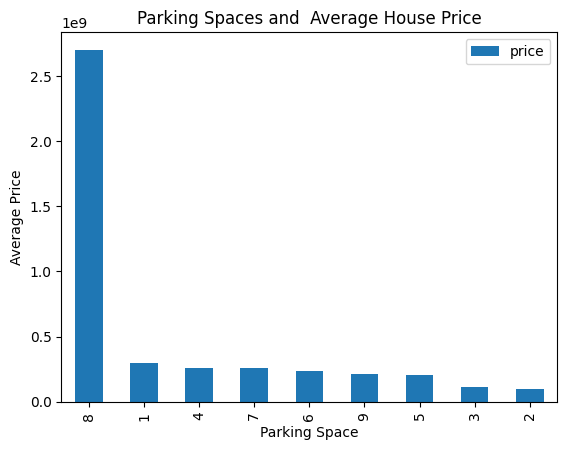

In [19]:
# Select only numeric columns for aggregation
numeric_cols = df.select_dtypes(include=[np.number]).columns
df.groupby('parking_space')[numeric_cols].mean().sort_values('price', ascending=False).head(10).plot(y='price', kind='bar')
plt.title('Parking Spaces and  Average House Price')
plt.xlabel('Parking Space')
plt.ylabel('Average Price')
plt.show()

Obviously, the more the parking space the higher the price. 

This is consistent with both theory and expectation

In [20]:
df.columns

Index(['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'title', 'town',
       'state', 'price'],
      dtype='object')

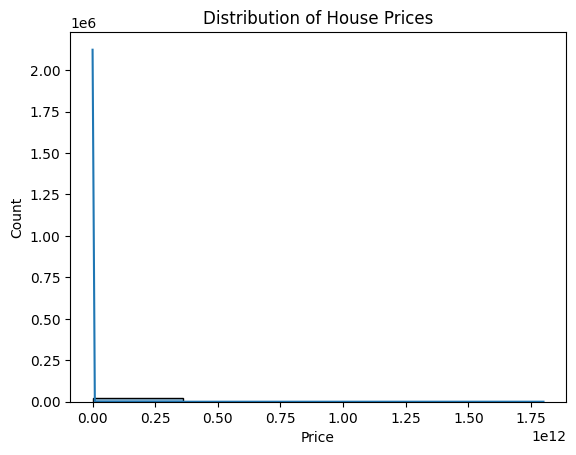

In [21]:
sns.histplot(df['price'], bins=5, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.show()

The long tail in the price distribution makes it difficult to visualize the data clearly—and it has an even greater impact on model performance. 

Such skewed distributions can confuse the model, preventing it from learning effectively.

A common solution to this problem is to apply a log transformation to the price values. 

This helps reduce the skewness and mitigates the negative effect on the model.





In [22]:
df['log_price'] = np.log(df['price'])

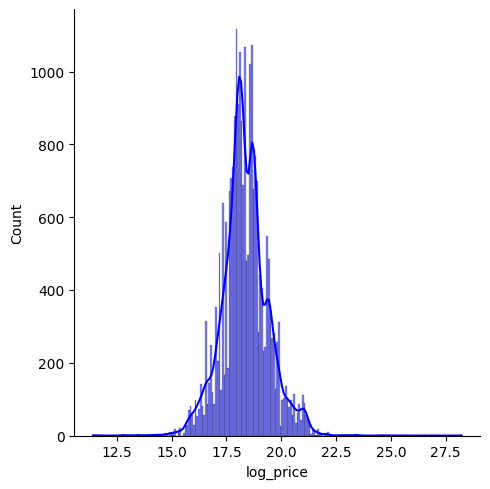

In [23]:
sns.displot(x = df['log_price'], kde = True, color = 'blue')

As we can see, the log transformation effectively removes the long tail, resulting in a distribution that more closely resembles a bell-shaped, or normal, curve.

This is generally desirable, as models like linear regression tend to perform better when the target variable follows a normal distribution.

Let's took a look at the dataset again,

In [24]:
df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,log_price
0,6,5,5,4,Detached Duplex,Mabushi,Abuja,450000000.0,19.924758
1,4,5,5,4,Terraced Duplexes,Katampe,Abuja,800000000.0,20.500122
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0,18.603002
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0,17.504390
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0,18.132999


Remember, our objective is to build a machine learning model that can predict house prices. 

Therefore, we won’t be using all the columns in the dataset—particularly some of the categorical features that may not contribute meaningfully to the prediction.

In [25]:
df['town'].nunique()

189

Having 125 different towns is quite a lot. 

While I would have liked to include this feature in the predictive model, encoding all 125 towns would significantly increase the model's complexity and could negatively impact its efficiency.

Therefore, we’ll drop this column, as it doesn’t add meaningful value to our dataset.

In [26]:
data = df.drop(columns = ['title','town'], axis = 1)

#### Data Preprocessing

Here, our goal is to prepare the data for our model training.

In [27]:
data

,bedrooms,bathrooms,toilets,parking_space,state,price,log_price
0,6,5,5,4,Abuja,450000000.0,19.924758
1,4,5,5,4,Abuja,800000000.0,20.500122
2,4,5,5,4,Lagos,120000000.0,18.603002
3,4,4,5,6,Lagos,40000000.0,17.504390
4,4,4,5,2,Lagos,75000000.0,18.132999
...,...,...,...,...,...,...,...
24321,2,2,2,4,Abuja,15000000.0,16.523561
24322,4,5,5,4,Ogun,25000000.0,17.034386
24323,4,5,5,4,Lagos,68000000.0,18.035018
24324,3,4,4,3,Lagos,78000000.0,18.172219


Since we’ll be encoding the state feature, let’s import the necessary libraries from scikit-learn.

In [28]:
# Convert categorical variables [State] to numerical using Label Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # initializing the label encoder
data['state'] = le.fit_transform(data['state']) # converting the state column to numerical values

Below, shows that we have successfully encoded the state features using Label Encoder

In [29]:
data.head()

,bedrooms,bathrooms,toilets,parking_space,state,price,log_price
0,6,5,5,4,1,450000000.0,19.924758
1,4,5,5,4,1,800000000.0,20.500122
2,4,5,5,4,18,120000000.0,18.603002
3,4,4,5,6,18,40000000.0,17.504390
4,4,4,5,2,18,75000000.0,18.132999


Here, let’s define our dependent and independent variables

In [30]:
X = data.drop(columns = ['price', 'log_price'], axis = 1) # Independent variables
y = data['log_price'] # Dependent or Target variable

Here, we import the libraries needed for model splitting, evaluation, hyperparameter tuning (using GridSearchCV), and the machine learning models themselves.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import GridSearchCV

Next, we’ll split the data into training and test sets—allocating 80% of the data for training and the remaining 20% for testing.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42)

In [33]:
X_train.shape

(19460, 5)

Just to confirm the 80, 20 splitting

In [34]:
data.shape[0]*0.8

19460.8

In [35]:
data.shape[0]*0.2

4865.2

#### Training

Now that we’ve completed the preprocessing stage, we’ll train several machine learning models on the training set using cross-validation to determine which one performs best on our data.

We’ll evaluate model performance using the Root Mean Squared Error (RMSE) as our metric.

Let's explore the following models to pick the best model

 - Linear Regression
 - Ridge Model
 - Decision Tree Regressor
 - Random Forest Regressor
 - XGBoost Regressor

In [36]:
# Linear Regression Model

lr =LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
# initiz
lr_pred = lr.predict(X_test)

In [38]:
rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
r2 = r2_score(y_test, lr_pred)

print(f'RMSE: {rmse}')
#print(f'R2 Score: {r2}')

RMSE: 0.8620797476786878


In [39]:
#Ridge Regression Model
ri =Ridge()
ri.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [40]:
ri_pred = ri.predict(X_test)

In [41]:
rmse = np.sqrt(mean_squared_error(y_test, ri_pred))
r2 = r2_score(y_test, ri_pred)

print(f'RMSE: {rmse}')
#print(f'R2 Score: {r2}')

RMSE: 0.862079294975358


In [42]:
#Decision Tree Regressor

Dt = DecisionTreeRegressor()

In [43]:
#Here, we are trying to specify the parameters for the model, for this is not necessary needed because we are yet to pick the best model

param_grid_dt = {
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50, 60],
    'min_samples_split': [2,5, 10],
    'min_samples_leaf': [1, 2,3,4,5]
}

In [44]:
# initiazing the GridSearchCV use largely for parameter tunning, still not necessary at this point.

grid_model_dt = GridSearchCV(Dt, param_grid_dt,  cv =5, scoring ='neg_mean_squared_error')

In [45]:
#here, we fit in the model

grid_model_dt 

,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['mse', 'friedman_mse', ...], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [46]:
#Train our model

grid_model_dt .fit(X_train, y_train)

,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['mse', 'friedman_mse', ...], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'friedman_mse'


In [47]:
grid_model_dt.best_params_

{'criterion': 'friedman_mse',
 'max_depth': None,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'splitter': 'random'}

In [48]:
dt_pred = grid_model_dt.predict(X_test)

In [49]:
rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
r2 = r2_score(y_test, dt_pred)

print(f'RMSE: {rmse}')
#print(f'R2 Score: {r2}')

RMSE: 0.7818471726582099


In [50]:
#Random Forest Regressor Model

rf = RandomForestRegressor()


param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],    
    'min_samples_leaf': [1, 2, 3, 4, 5]}

In [51]:
grid_model_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_model_rf.fit(X_train, y_train)
grid_model_rf

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [52]:
grid_model_rf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 100}

In [53]:
rf_pred = grid_model_rf.predict(X_test)

In [54]:
rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
r2 = r2_score(y_test, rf_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

RMSE: 0.7684962905083159
R2 Score: 0.4577211708612724


In [55]:
# XGBoost Regressor Model

xgb = XGBRegressor()

param_grid_xgb = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]}


In [56]:
grid_model_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='neg_mean_squared_error')
grid_model_xgb.fit(X_train, y_train)

,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.8, 0.9, ...], 'gamma': [0, 0.1, ...], 'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 5, ...], ...}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [57]:
grid_model_xgb.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 100,
 'subsample': 0.9}

In [58]:
xgb_pred = grid_model_xgb.predict(X_test)

In [59]:
rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
r2 = r2_score(y_test, xgb_pred)


print(f'RMSE: {rmse}')
#print(f'R2 Score: {r2}')

RMSE: 0.7644549746130166


Here, we provide a summary of the five models and evaluate their performance using Root Mean Squared Error (RMSE) to assess how well each model performs.

In [60]:
print(f"Linear Regression RMSE: {np.sqrt(mean_squared_error(y_test, lr_pred))}")
print(f"Ridge Regression RMSE: {np.sqrt(mean_squared_error(y_test, ri_pred))}")
print(f"Decision Tree RMSE: {np.sqrt(mean_squared_error(y_test, dt_pred))}")
print(f"Random Forest RMSE: {np.sqrt(mean_squared_error(y_test, rf_pred))}")
print(f"XGBoost RMSE: {np.sqrt(mean_squared_error(y_test, xgb_pred))}")

Linear Regression RMSE: 0.8620797476786878
Ridge Regression RMSE: 0.862079294975358
Decision Tree RMSE: 0.7818471726582099
Random Forest RMSE: 0.7684962905083159
XGBoost RMSE: 0.7644549746130166


As expected, XGBoost delivered the best performance. While Random Forest came close, we’ll proceed with XGBoost as our final model of choice

Now, let’s use Grid Search to explore different hyperparameter combinations and identify the ones that minimize the prediction error.

In [61]:
# We already imported the needed libraries, let's use the grid searcg

xgb = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, subsample=0.9, colsample_bytree=0.8, gamma=0.1)
xgb.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


Here, we aim to identify the best hyperparameters and apply them when initializing the XGBoost model.

In [62]:
grid_model_xgb.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 100,
 'subsample': 0.9}

In [63]:
xgb = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, subsample=0.9, colsample_bytree=0.8, gamma=0.1)
xgb.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


We’ve trained the model. Now to test it we have to make our test data look like the training data.

In [64]:
xgb_pred = xgb.predict(X_test)

Remember, we applied a log transformation to the price column, which is our target variable.

Now, let’s convert our predictions back to Naira by applying the inverse transformation and evaluate how well our model performed.

In [65]:
y_test = y_test.values

In [66]:
test = np.exp(y_test)
pre = np.exp(xgb_pred)

In [67]:
mse = mean_squared_error(test, pre)
rmse =np.sqrt(mse).round(1)
r2 = r2_score(test, pre)
print(f'RMSE: {rmse}')



RMSE: 267486769.1


We have an error of ₦267.49 million. But is this considered large?

Let’s examine the following insights to better understand whether this level of error is significant or acceptable.

- Average House price
- Minimum house price
- Maximum
- RMSE

In [68]:
print(f"Averge House price :", "{:,.0f}".format(3.013802e+08))
print(f"Min house price :", "{:,.0f}".format(9.000000e+04))
print(f"Max house price :", "{:,.0f}".format(1.800000e+12))
print(f"RMSE : {rmse:,.1f}")


Averge House price : 301,380,200
Min house price : 90,000
Max house price : 1,800,000,000,000
RMSE : 267,486,769.1


An error of ₦267.49 million is reasonable when you consider that our price range spans from ₦90,000 to ₦1.80 trillion.

#### Result

For this project, I experimented with various regression models and ultimately chose the XGBoost Regressor to predict house prices in Nigeria. 

It delivered strong performance, achieving a Root Mean Squared Error (RMSE) of ₦267.49 million.

Now, let’s examine the distribution of the predicted prices compared to the actual prices.



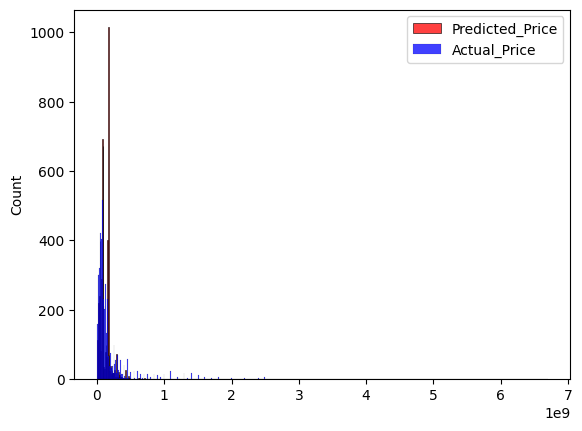

In [69]:
sns.histplot(pre, label = 'Predicted_Price', color = 'red')
sns.histplot(test, label = 'Actual_Price', color = 'blue')

plt.legend()
plt.show()

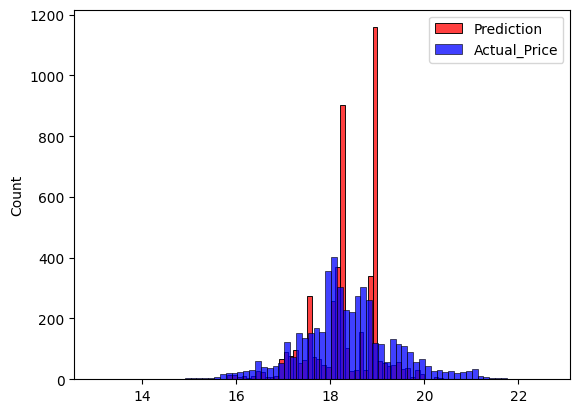

In [70]:
sns.histplot(xgb_pred, label = 'Prediction', color = 'red')
sns.histplot(y_test, label = 'Actual_Price', color = 'blue')

plt.legend()
plt.show()

We can observe that our model closely followed the actual prices for the most part. However, at certain points, the predicted values exceeded the actual prices.

This reflects the complex dynamics of Nigeria’s economy, particularly in light of recent government reforms and policies—such as fuel subsidy removal and exchange rate unification—which have significantly driven up the cost of living and inflated prices across various sectors.

Having lived in Nigeria all my life, I can confidently say that the prices of goods and services in recent years have not only doubled but have increased at an unpredictable and sometimes astonishing rate.

For example, within the span of just one year, house prices in some areas surged by over 100%. That’s a dramatic shift.

These factors—and others like them—may explain why our model initially aligned well with actual prices but began to overestimate as the data reflected increasingly volatile market conditions.

In [71]:
data_pred = pd.DataFrame(pre, columns = ['Prediction'])
data_pred ['Target'] = test
data_pred ['Difference%'] = np.absolute((data_pred['Target']) - (data_pred['Prediction'])) / data_pred ['Target']*100
pd.set_option ('display.float_format', lambda x: '%.2f' % x)
data_pred  = data_pred .sort_values(by = ['Difference%'])
data_pred 

,Prediction,Target,Difference%
1429,359941568.00,360000000.00,0.02
1989,14994690.00,15000000.00,0.04
460,78040696.00,78000000.00,0.05
1539,8495172.00,8500000.00,0.06
4613,60093096.00,60000000.00,0.16
...,...,...,...
3676,199372464.00,4000000.00,4884.31
2246,154103664.00,3000000.00,5036.79
3914,81339304.00,1300000.00,6156.87
48,30398974.00,462837.00,6467.97


We're encountering a NaN issue in our target column, which shouldn't be the case. 

This is most likely due to a mismatch in the lengths of the prediction array (pred) and the target array (test).

Let’s work on resolving this issue by first confirming that the lengths of the prediction and test columns match.

In [72]:
print(f"length of t :{len(test)}")
print(f"length of t :{len(pre)}")

length of t :4866
length of t :4866


From the above, it’s clear that the lengths of the prediction and test arrays do match.

The issue is likely due to Pandas aligning data by index labels rather than by position.

To resolve this, let’s reset the index of the test data before assigning the predictions.

In [73]:
# Ensure t is a flat Series or array aligned by position
test = pd.Series(test).reset_index(drop=True)

# Create DataFrame from predictions
df_pred = pd.DataFrame(pre, columns=['Prediction'])

# Assign target
df_pred['Target'] = test

# Calculate % difference
df_pred['Difference%'] = (
    np.abs(df_pred['Target'] - df_pred['Prediction']) / df_pred['Target']
) * 100

# Format and sort
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pred = df_pred.sort_values(by='Difference%').reset_index(drop=True)

df_pred


,Prediction,Target,Difference%
0,359941568.00,360000000.00,0.02
1,14994690.00,15000000.00,0.04
2,78040696.00,78000000.00,0.05
3,8495172.00,8500000.00,0.06
4,60093096.00,60000000.00,0.16
...,...,...,...
4861,199372464.00,4000000.00,4884.31
4862,154103664.00,3000000.00,5036.79
4863,81339304.00,1300000.00,6156.87
4864,30398974.00,462837.00,6467.97


We can observe that our model closely followed the actual prices for the most part. However, at certain points, the predicted values exceeded the actual prices.

This reflects the complex dynamics of Nigeria’s economy, particularly in light of recent government reforms and policies—such as fuel subsidy removal and exchange rate unification—which have significantly driven up the cost of living and inflated prices across various sectors.

Having lived in Nigeria all my life, I can confidently say that the prices of goods and services in recent years have not only doubled but have increased at an unpredictable and sometimes astonishing rate.

For example, within the span of just one year, house prices in some areas surged by over 100%. That’s a dramatic shift.

These factors—and others like them—may explain why our model initially aligned well with actual prices but began to overestimate as the data reflected increasingly volatile market conditions.

We can see that our model was good at imitating the price.

Based on the results above, we can conclude that our goal of building a model capable of estimating car prices has been successfully achieved.

#### Conclusion

With this project, I successfully built a machine learning model capable of predicting house prices based on a set of key features. This insight can be incredibly valuable for both individuals and companies seeking to estimate property values or better understand the dynamics of Nigeria’s real estate market.

Property valuation is often a complex task reserved for experts. However, by analyzing historical data, we can uncover meaningful patterns using machine learning—achieving results that are both practical and insightful. This kind of knowledge can guide smarter investment decisions, such as where to invest and which types of properties to focus on.

To view this project on github, please visit: https://github.com/Uchechukwu-2345/Nigeria-House-Price-Prediction.git (GitHub)

I have also deployed the model as a Streamlit web app.

To try out the prediction app, please visit: [http://localhost:8501/]

Thank you for reading!

#### Limitations

- One key limitation is that the model may not accurately reflect current market realities, as the dataset used was sourced from Kaggle and lacks a clear timestamp.

- It was not possible to determine when the data was collected, making it difficult to assess whether it is recent or outdated.

- Some potentially valuable features, such as house title and town, were excluded from the model due to complexity in encoding. Including them might have improved model performance.

- Finally, the model does not account for inflation, meaning the house prices were not adjusted for changes in purchasing power over time.

Saving and exporting our model for streamlit deployment

In [74]:
# Save the model
import joblib
joblib.dump(xgb, 'nigeria_house_price_model.pkl')

['nigeria_house_price_model.pkl']